## FinMark Corporation
### Wagas, Jemelie B.

#### Product Offering Data

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Product_Offering_Data.csv') 
df.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [2]:
# Check if there are null values
df.isna().all()

Product_ID             False
Product_Name           False
Product_Type           False
Risk_Level             False
Target_Age_Group        True
Target_Income_Group    False
dtype: bool

In [42]:
# Quick check for the content of Product Name column but can also use .duplicated()==1 syntax to identify duplicate values 
df = pd.read_csv('Product_Offering_Data.csv') 
df['Product_Name']

0              Platinum Credit Card
1              Gold Savings Account
2     High-Yield Investment Account
3                     Mortgage Loan
4                         Auto Loan
5                     Personal Loan
6             Youth Savings Account
7        Retirement Investment Fund
8                     Business Loan
9                Travel Credit Card
10             Gold Savings Account
11               Travel Credit Card
12    High-Yield Investment Account
13                    Personal Loan
14             Platinum Credit Card
Name: Product_Name, dtype: object

In [41]:
# Remove the duplicates from the Product Name column
df = pd.read_csv('Product_Offering_Data.csv') 
df = df.drop_duplicates()
df['Product_Name']

0             Platinum Credit Card
1             Gold Savings Account
2    High-Yield Investment Account
3                    Mortgage Loan
4                        Auto Loan
5                    Personal Loan
6            Youth Savings Account
7       Retirement Investment Fund
8                    Business Loan
9               Travel Credit Card
Name: Product_Name, dtype: object

In [47]:
# Check data types
df = pd.read_csv('Product_Offering_Data.csv')
df.dtypes

Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object

##### ------DONE--------

#### Transaction Data

In [1]:
import pandas as pd

#Load the CSV file into a DataFrame
df = pd.read_csv('Transaction_Data.csv') 
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [2]:
# Check null values
df[df['Transaction_Amount'].isna()==1]

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
31,32,63,2023-01-02 07:00:00,NaN,Purchase
212,213,411,2023-01-09 20:00:00,NaN,Purchase
253,254,979,2023-01-11 13:00:00,NaN,Bill Payment
272,273,253,2023-01-12 08:00:00,NaN,Purchase
...,...,...,...,...,...
4691,4692,567,2023-07-15 11:00:00,NaN,Purchase
4846,4847,366,2023-07-21 22:00:00,NaN,Investment
4862,4863,460,2023-07-22 14:00:00,NaN,Investment
4876,4877,917,2023-07-23 04:00:00,NaN,Investment


In [46]:
# Fill those with null values as 0
df = pd.read_csv('Transaction_Data.csv')
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(0)
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,0.0,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv('Transaction_Data.csv') 

# Calculate Z-scores
df['Z-Score'] = (df['Transaction_Amount'] - df['Transaction_Amount'].mean()) / df['Transaction_Amount'].std()

# Identify outliers
outliers_z = df[np.abs(df['Z-Score']) > 3]
print("Outliers detected using Z-Score method:")
print(outliers_z)


Outliers detected using Z-Score method:
      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
612              613          191  2023-01-26 12:00:00            480300.0   
1264            1265          772  2023-02-22 16:00:00            390200.0   
1738            1739           27  2023-03-14 10:00:00            194500.0   
2045            2046           59  2023-03-27 05:00:00            183500.0   
2184            2185          850  2023-04-02 00:00:00             94500.0   
2270            2271          521  2023-04-05 14:00:00            428900.0   
3037            3038          690  2023-05-07 13:00:00            458600.0   
3059            3060          195  2023-05-08 11:00:00            270900.0   
3289            3290          649  2023-05-18 01:00:00            175600.0   
4852            4853          396  2023-07-22 04:00:00            362700.0   

     Transaction_Type    Z-Score  
612      Bill Payment  32.203343  
1264     Bill Payment  26.12310

In [4]:
# Quick check for the content of Transaction Type column 
df['Transaction_Type'].unique()

array(['Purchase', 'Bill Payment', 'Investment', 'Loan Payment'],
      dtype=object)

In [5]:
# Check data types
df.dtypes

Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object

In [6]:
df['Customer_ID'] = df['Customer_ID'].astype('str')

In [8]:
# Check data types
df.dtypes

Transaction_ID          int64
Customer_ID            object
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object

In [16]:
# Check columns with null values
df.isna().all()

Customer_ID                False
Satisfaction_Score         False
Feedback_Comments          False
Likelihood_to_Recommend    False
dtype: bool

array([[<Axes: title={'center': 'Transaction_ID'}>,
        <Axes: title={'center': 'Customer_ID'}>],
       [<Axes: title={'center': 'Transaction_Amount'}>, <Axes: >]],
      dtype=object)

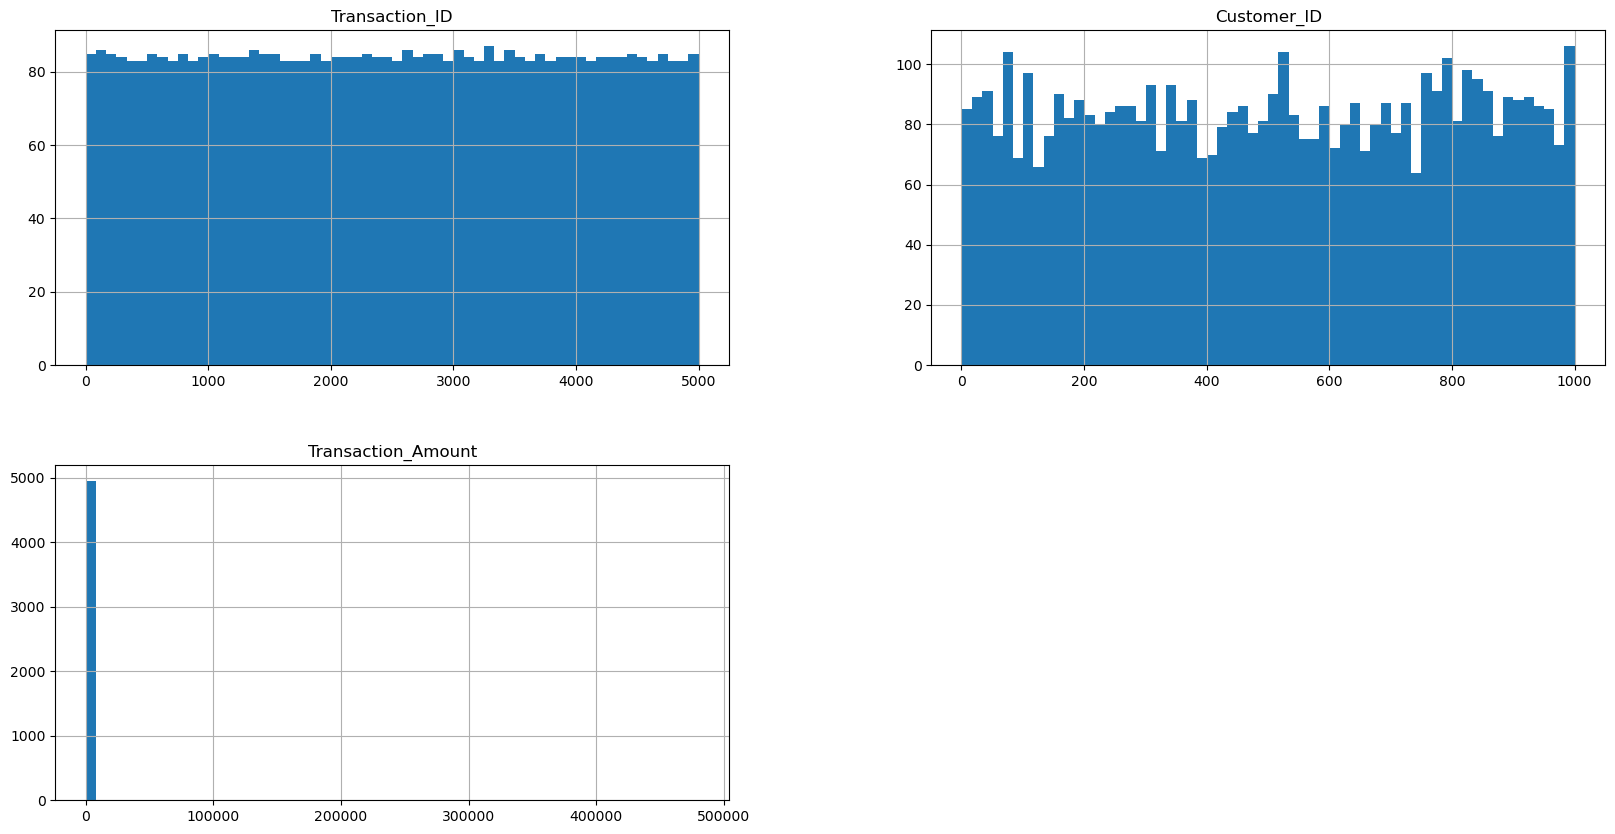

In [54]:
df = pd.read_csv('Transaction_Data.csv') 
df.hist(bins=60, figsize=(20,10))

##### ------DONE--------

#### Customer Feedback

In [10]:
import pandas as pd

#Load the CSV file into a DataFrame
df = pd.read_csv('Customer_Feedback_Data.csv') 
df.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [12]:
# Check data types
df.dtypes

Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

In [13]:
# Change data type to string
df['Customer_ID'] = df['Customer_ID'].astype('str')

In [14]:
# Check data types
df.dtypes

Customer_ID                 object
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

In [15]:
# Check null values
df.isna().all()

Customer_ID                False
Satisfaction_Score         False
Feedback_Comments          False
Likelihood_to_Recommend    False
dtype: bool

In [32]:
df.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('Customer_Feedback_Data.csv') 

# Calculate Z-scores
df['Z-Score'] = (df['Satisfaction_Score'] - df['Satisfaction_Score'].mean()) / df['Satisfaction_Score'].std()

# Identify outliers
outliers_z = df[np.abs(df['Z-Score']) > 3]
print("Outliers detected using Z-Score method:")
print(outliers_z)


Outliers detected using Z-Score method:
      Customer_ID  Satisfaction_Score Feedback_Comments  \
529           530                52.0      Good service   
573           574                60.0      Good service   
857           858                56.0    Very satisfied   
1090          218                60.0      Good service   
2451          582                51.0      Good service   
3012          926                58.0      Good service   
3306          503                51.0         Excellent   
4131          949                53.0    Unsatisfactory   
4499          934                58.0      Good service   
4650          615                54.0    Unsatisfactory   

      Likelihood_to_Recommend    Z-Score  
529                        10  12.842110  
573                         9  15.060320  
857                        10  13.951215  
1090                        1  15.060320  
2451                        5  12.564833  
3012                        9  14.505767  
3306     

array([[<Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Satisfaction_Score'}>],
       [<Axes: title={'center': 'Likelihood_to_Recommend'}>, <Axes: >]],
      dtype=object)

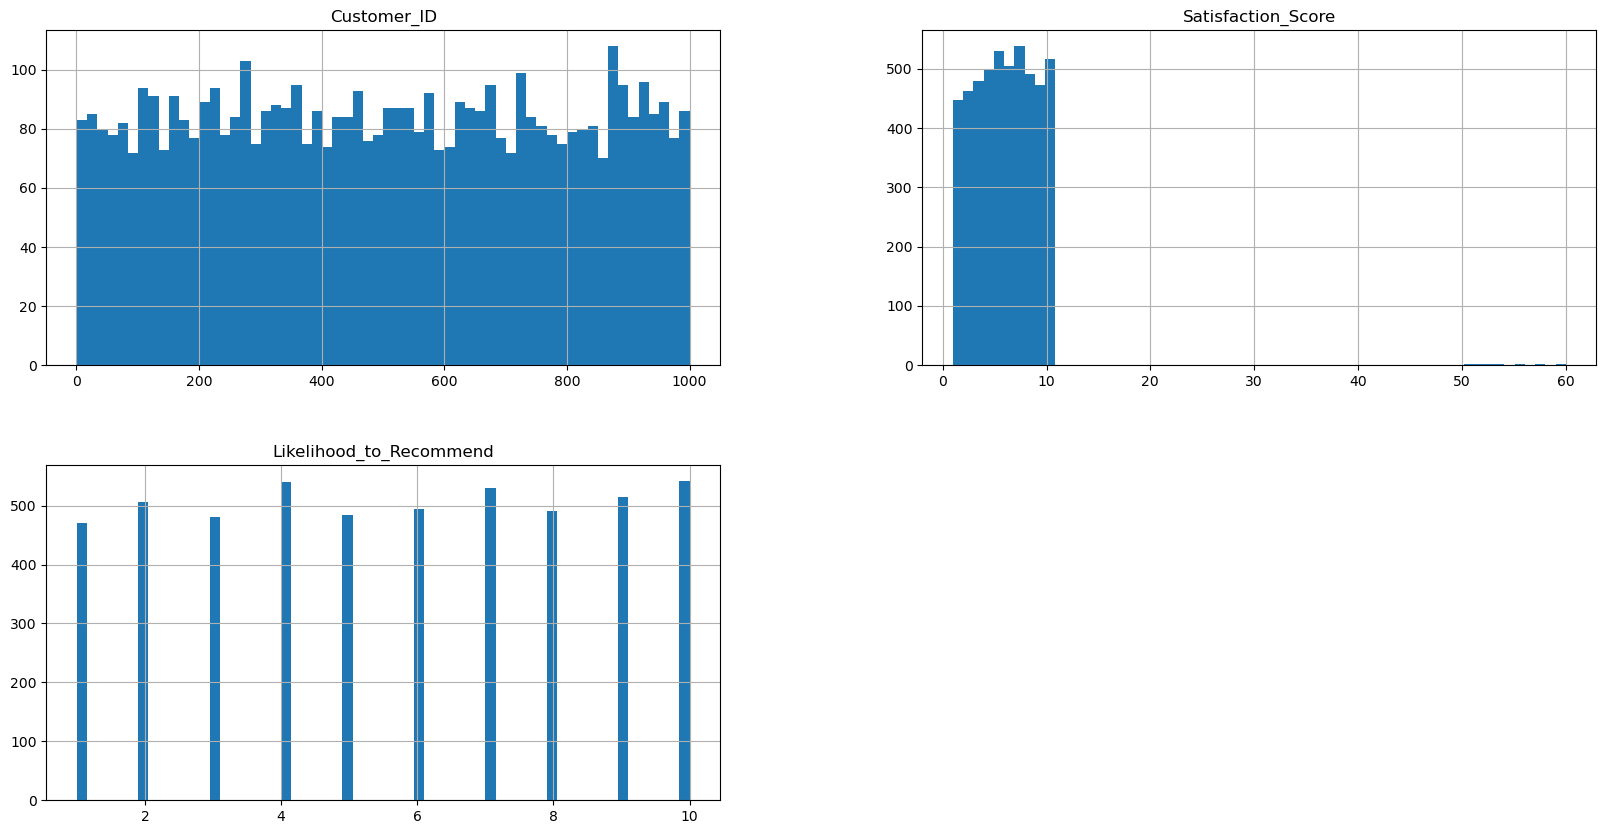

In [55]:
df = pd.read_csv('Customer_Feedback_Data.csv')
df.hist(bins=60, figsize=(20,10))